In [9]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

# 1절. XOR

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential # 모델 객체를 생성하기 위해
from tensorflow.keras.layers import Dense # 생성된 모델 레이어를 쌓기 위해
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 셋
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[0], [1], [1], [0]])

# 2. 모델 구성
model = Sequential()
model.add(Dense(units = 10, input_dim = 2, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu')) # 은닉층은 input_dim을 쓰지 않는다.
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

print(model.summary())

# 3. 모델 학습과정 설정
# model.compile(loss = 'mse') mse = mean square error
model.compile(loss      = 'binary_crossentropy', # 다중분류일 경우 : categorical_crossentropy
              optimizer = 'adam', 
              metrics   = ['binary_accuracy'])

# 4. 학습시키기
hist = model.fit(x_data, y_data, epochs = 100, verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 - 0s - loss: 0.6870 - binary_accuracy: 0.7500
Epoch 2/100
1/1 - 0s - loss: 0.6850 - binary_accuracy: 0.7500
Epoch 3/100
1/1 - 0s - loss: 0.6829 - binary_accuracy: 0.7500
Epoch 4/100
1/1 - 0s - loss: 0.6809 - binary_accuracy: 0.7500
Epo

In [4]:
# 5. 모델 평가하기
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

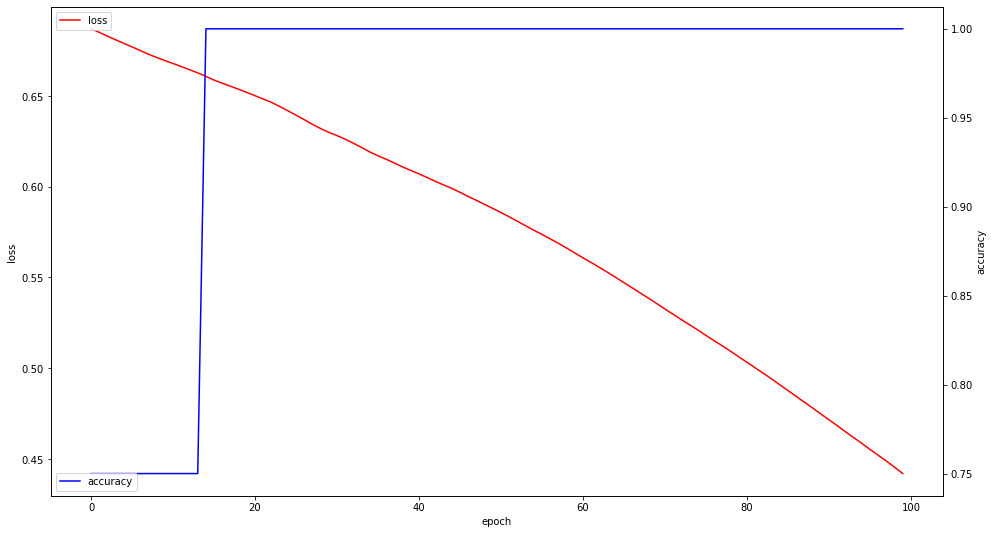

In [5]:
fig, loss_ax = plt.subplots(figsize = (16, 9))
loss_ax.plot(hist.history['loss'], 
             'r',
             label = 'loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 
            'b', 
            label = 'accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [8]:
# 입력 값을 받아 출력 ( 0 0 / 0 1 / 1 0 / 1 1)
while True:
    input_list = input('space로 분리해서 0이나 1을 2개 입력(종료:9) :').strip().split()    
    input_data = list(map(int, input_list))
    
    if input_data[0] == 9:
        break;
        
    input_data = np.array(input_data).reshape(-1, 2)    

    print('입력값 :', input_data)
    print('예측값 :', int(model.predict(input_data).round()) )

space로 분리해서 0이나 1을 2개 입력(종료:9) :0 1
입력값 : [[0 1]]
예측값 : 1
space로 분리해서 0이나 1을 2개 입력(종료:9) :1 1
입력값 : [[1 1]]
예측값 : 0
space로 분리해서 0이나 1을 2개 입력(종료:9) :1 0
입력값 : [[1 0]]
예측값 : 1
space로 분리해서 0이나 1을 2개 입력(종료:9) :9


# 2절. OR

In [10]:
# 1. 데이터 셋
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_data = np.array([[1], [0], [0], [1]])

# 2. 모델 구성
model = Sequential()

model.add(Dense(units = 10, input_dim = 2, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

print(model.summary())
# 3. 모델 학습과정 binary crossentropy
model.compile(loss      = 'binary_crossentropy', 
              metrics   = ['binary_accuracy'], 
              optimizer = 'adam')

# 4. 학습시키기
hist = model.fit(x_data, y_data, 
                 epochs  = 100, 
                 verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 - 0s - loss: 0.6618 - binary_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 0.6603 - binary_accuracy: 0.5000
Epoch 3/100
1/1 - 0s - loss: 0.6588 - binary_accuracy: 0.5000
Epoch 4/100
1/1 - 0s - loss: 0.6573 - binary_accuracy: 0.5000
Epoch 5/100
1/1 - 0s - loss: 0.6559 - binary_accuracy: 0.5000
Epoch 6/100
1/1 - 0s - loss: 0.6544 - binary_accuracy: 0.5000
Epoch 7/1

In [11]:
# 5. 학습과정 살펴보고 평가(evaluate)해보기
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])